# Explore Testis Rep 4

Sharvani has generated a fourth replicate of w1118 with her translocation run. I have run the standard scRNA-Seq pipleine and now I taking a peak to see how it is looking.

The replicate is looking really good. I think it replicates very well. I went through by hand and looked at the lit gene heatmap and was able to recapituatle the cell types that we have previously id.

In [104]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.config import read_config
from larval_gonad.notebook import Nb
from larval_gonad.normalization import tpm, zscore
from larval_gonad.scRNAseq import TSNEPlot

In [78]:
nb = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_rep4_force')

last updated: 2019-01-07 
Git hash:


In [4]:
!ls ../output/scrnaseq-wf/scrnaseq_rep4_force/

biomarkers_res.0.6.tsv		raw.tsv
clusters.tsv			rep4_dispersion.tsv
dispersion.tsv			rep4_var_genes.tsv
metadata.tsv			scaled.tsv
normalized_read_counts.tsv	scrnaseq_rep4_force.html
principal_components_cell.tsv	seurat.Robj
principal_components_gene.tsv	tsne.tsv
principal_components_stdev.tsv	var_genes.txt


In [42]:
metadata = nb.seurat.get_metadata()
clusters = metadata['res.0.6']

In [43]:
tsne = nb.seurat.get_tsne()

In [44]:
df = tsne.join(clusters)

In [45]:
df.head()

,tSNE_1,tSNE_2,res.0.6
FBgn,,,
rep4_AAACCTGAGATAGGAG,9.007998,-3.188284,0
rep4_AAACCTGCAAGGGTCA,12.110879,0.441881,0
rep4_AAACCTGCACCCATTC,-3.313766,11.686609,3
rep4_AAACCTGGTAGCGTCC,-35.240487,10.999648,5
rep4_AAACCTGGTGACGGTA,-2.289945,-3.358706,0


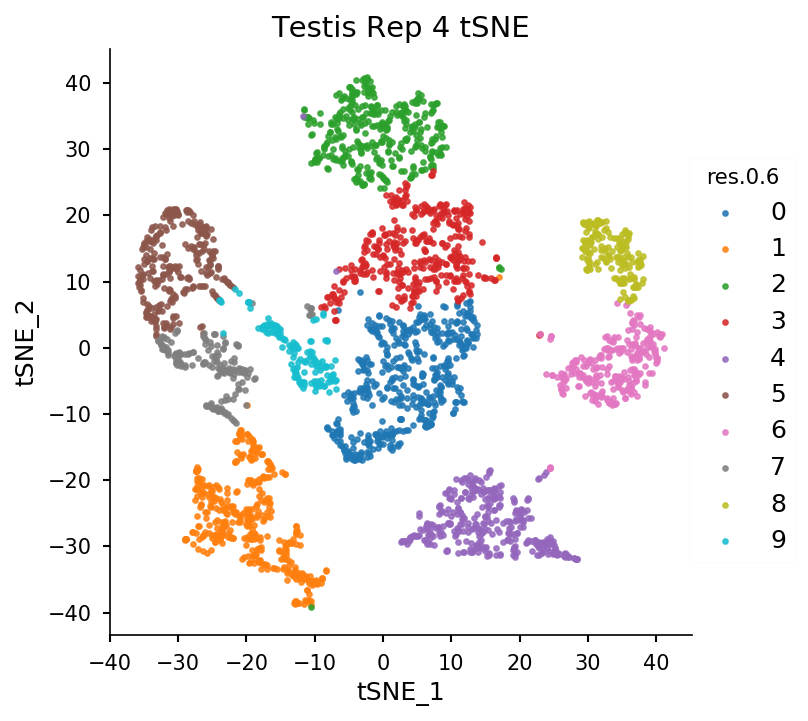

In [115]:
sns.lmplot('tSNE_1', 'tSNE_2', data=df, hue='res.0.6', fit_reg=False, scatter_kws=dict(s=5))
plt.title('Testis Rep 4 tSNE');

In [65]:
lit_genes = read_config('../paper_submission/config.yaml', 'lit_genes')
lit_fbgns = [nb.symbol2fbgn[g] for g in lit_genes]

In [66]:
lit_fbgns

['FBgn0283442',
 'FBgn0000158',
 'FBgn0004372',
 'FBgn0041103',
 'FBgn0038225',
 'FBgn0019828',
 'FBgn0041102',
 'FBgn0000964',
 'FBgn0000320',
 'FBgn0050418',
 'FBgn0000241']

In [70]:
raw_cnts = nb.seurat.get_raw()

In [100]:
raw_by_cluster = raw_cnts.T.join(clusters).groupby('res.0.6').sum().T
raw_by_cluster.index.name = 'Fbgn'
raw_by_cluster.columns.name = 'cluster'

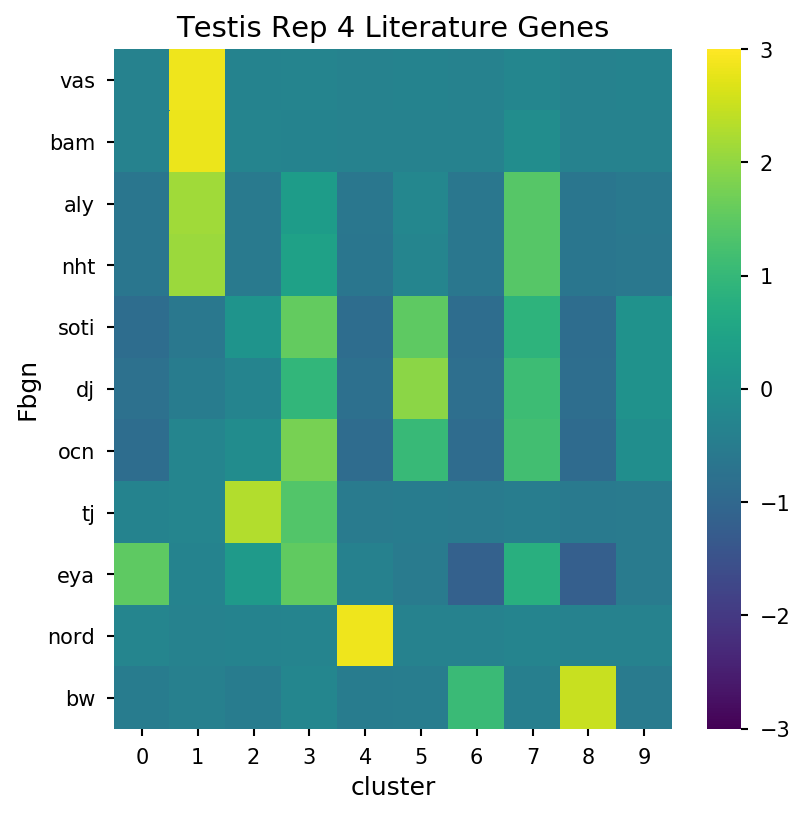

In [114]:
ax = sns.heatmap(zscore(raw_by_cluster.reindex(lit_fbgns)), vmin=-3, vmax=3, cmap='viridis')
yticks = [
    nb.fbgn2symbol[y.get_text()]
    for y in ax.get_yticklabels()
]

ax.set_yticklabels(yticks)
plt.title('Testis Rep 4 Literature Genes');